In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
data_train_path = r'D:\data_science_archivos\Fruits_Vegetables\train'
data_test_path = r'D:\data_science_archivos\Fruits_Vegetables\test'
data_val_path = r'D:\data_science_archivos\Fruits_Vegetables\validation'

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle= False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle= False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


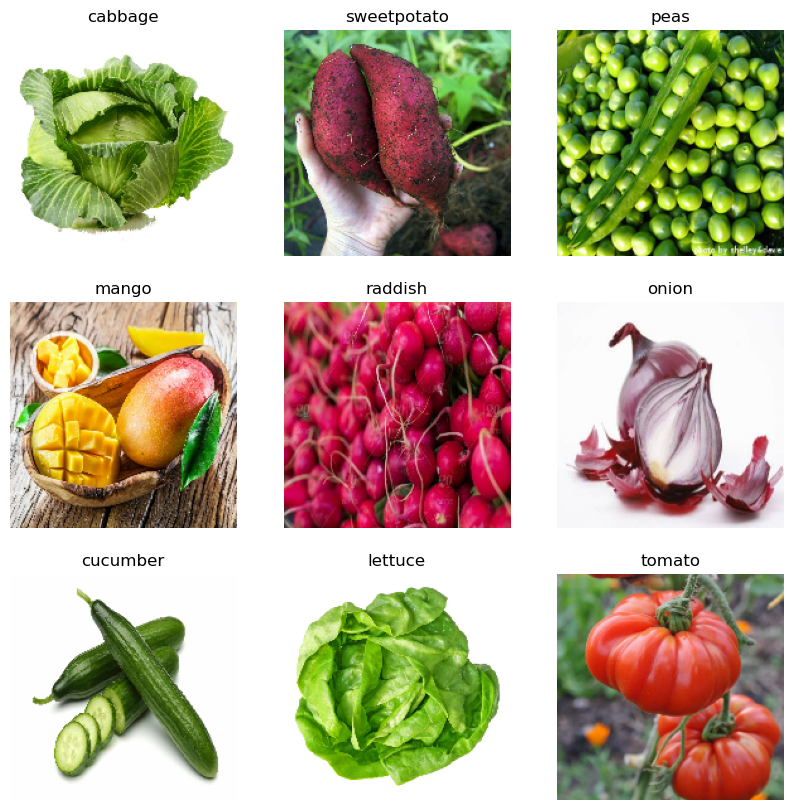

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
EPOCHS = 25
history = model.fit(data_train, validation_data=data_val, epochs= EPOCHS, verbose = 2 )

Epoch 1/25


98/98 - 64s - loss: 3.8307 - accuracy: 0.0636 - val_loss: 2.8730 - val_accuracy: 0.2507 - 64s/epoch - 658ms/step
Epoch 2/25
98/98 - 52s - loss: 2.8795 - accuracy: 0.2180 - val_loss: 2.0180 - val_accuracy: 0.4330 - 52s/epoch - 535ms/step
Epoch 3/25
98/98 - 54s - loss: 2.0780 - accuracy: 0.4254 - val_loss: 0.9501 - val_accuracy: 0.8006 - 54s/epoch - 554ms/step
Epoch 4/25
98/98 - 53s - loss: 0.8216 - accuracy: 0.7817 - val_loss: 0.5198 - val_accuracy: 0.9459 - 53s/epoch - 539ms/step
Epoch 5/25
98/98 - 53s - loss: 0.3268 - accuracy: 0.9509 - val_loss: 0.2920 - val_accuracy: 0.9544 - 53s/epoch - 539ms/step
Epoch 6/25
98/98 - 58s - loss: 0.1690 - accuracy: 0.9817 - val_loss: 0.1978 - val_accuracy: 0.9630 - 58s/epoch - 589ms/step
Epoch 7/25
98/98 - 53s - loss: 0.1014 - accuracy: 0.9878 - val_loss: 0.3020 - val_accuracy: 0.9544 - 53s/epoch - 540ms/step
Epoch 8/25
98/98 - 52s - loss: 0.0873 - accuracy: 0.9888 - val_loss: 0.2449 - val_accuracy: 0.9573 - 52s/epoch - 534ms/step
Epoch 

Text(0.5, 1.0, 'loss')

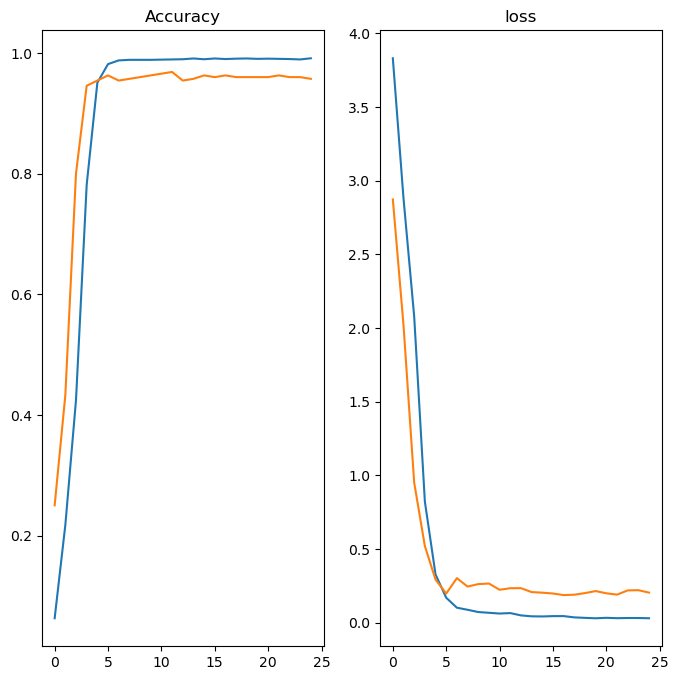

In [15]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label= 'training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label= 'validation accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label= 'training loss')
plt.plot(epochs_range, history.history['val_loss'], label= 'validation loss')
plt.title('loss')

In [16]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

predict = model.predict(img_bat)

1/1 [==============================] - 0s 218ms/step


In [17]:
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))



Veg/Fruit in image is banana with accuracy of 78.62


In [18]:
model.save('verduras_classify')

INFO:tensorflow:Assets written to: verduras_classify\assets


INFO:tensorflow:Assets written to: verduras_classify\assets
